In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
saver = tf.train.import_meta_graph("save/nn.ckpt.meta")

In [4]:
g = tf.get_default_graph()
for op in g.get_operations():
    print(op.name)

input_1
block1_conv1/random_uniform/shape
block1_conv1/random_uniform/min
block1_conv1/random_uniform/max
block1_conv1/random_uniform/RandomUniform
block1_conv1/random_uniform/sub
block1_conv1/random_uniform/mul
block1_conv1/random_uniform
block1_conv1/kernel
block1_conv1/kernel/IsInitialized/VarIsInitializedOp
block1_conv1/kernel/Assign
block1_conv1/kernel/Read/ReadVariableOp
block1_conv1/Const
block1_conv1/bias
block1_conv1/bias/IsInitialized/VarIsInitializedOp
block1_conv1/bias/Assign
block1_conv1/bias/Read/ReadVariableOp
block1_conv1/convolution/ReadVariableOp
block1_conv1/convolution
block1_conv1/BiasAdd/ReadVariableOp
block1_conv1/BiasAdd
block1_conv1/Relu
block1_conv2/random_uniform/shape
block1_conv2/random_uniform/min
block1_conv2/random_uniform/max
block1_conv2/random_uniform/RandomUniform
block1_conv2/random_uniform/sub
block1_conv2/random_uniform/mul
block1_conv2/random_uniform
block1_conv2/kernel
block1_conv2/kernel/IsInitialized/VarIsInitializedOp
block1_conv2/kernel/Assi

<class 'numpy.ndarray'>
(333, 324, 3)
uint8

<class 'numpy.ndarray'>
(150, 150, 3)
float32

<class 'numpy.ndarray'>
(150, 150, 3)
float32


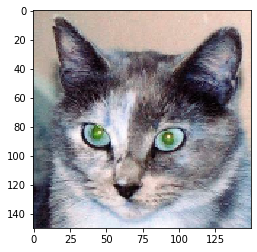

In [11]:
img_path = 'downloads/cats_and_dogs_small/test/cats/cat.1700.jpg'
img = cv2.imread(img_path)
print(type(img))
print(img.shape)
print(img.dtype)
print()

img = cv2.resize(img, dsize=(150, 150), interpolation=cv2.INTER_CUBIC).astype(np.float32)
print(type(img))
print(img.shape)
print(img.dtype)
print()

img /= 255.
print(type(img))
print(img.shape)
print(img.dtype)

plt.imshow(img)
plt.show()

<class 'numpy.ndarray'>
float32
(150, 150, 3)

<class 'numpy.ndarray'>
float32
(1, 150, 150, 3)

<class 'numpy.ndarray'>
float32
(1, 150, 150, 3)



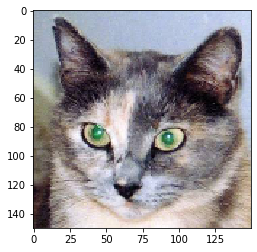

In [16]:
from keras.preprocessing import image
import numpy as np
    
img_path = 'downloads/cats_and_dogs_small/test/cats/cat.1700.jpg'
img = image.load_img(img_path, target_size=(150, 150)) # PIL.Image.Image
img_tensor = image.img_to_array(img) # numpy.ndarray
print(type(img_tensor))
print(img_tensor.dtype)
print(img_tensor.shape) # (150, 150, 3)
print()

img_tensor = np.expand_dims(img_tensor, axis=0)
print(type(img_tensor))
print(img_tensor.dtype)
print(img_tensor.shape) # (1, 150, 150, 3)
print()

img_tensor /= 255.
print(type(img_tensor))
print(img_tensor.dtype)
print(img_tensor.shape) # (1, 150, 150, 3)
print()

plt.imshow(img_tensor[0])
plt.show()

INFO:tensorflow:Restoring parameters from save/nn.ckpt
(1, 75, 75, 64)


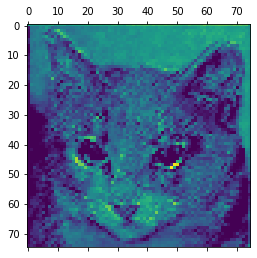

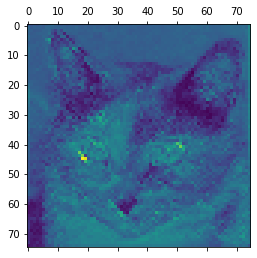

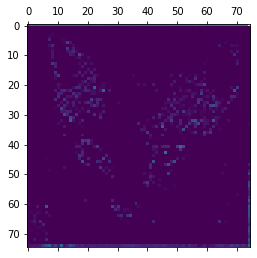

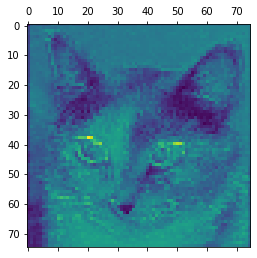

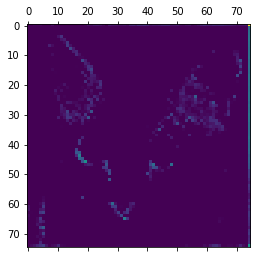

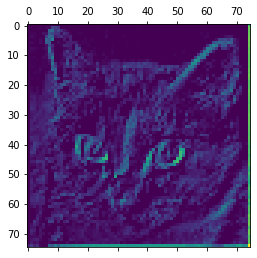

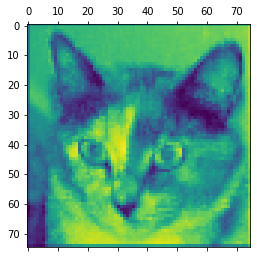

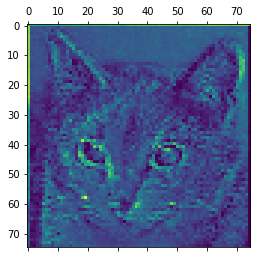

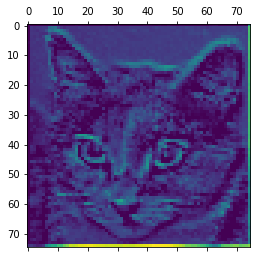

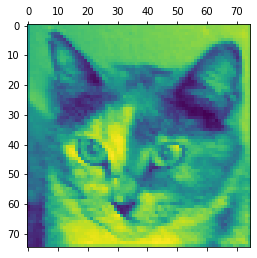

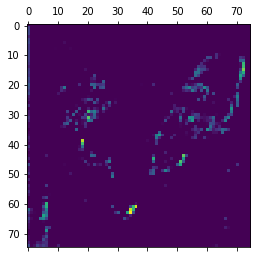

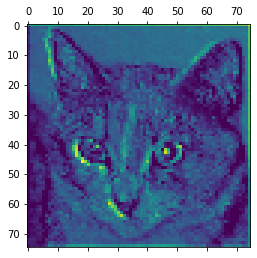

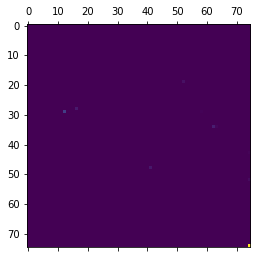

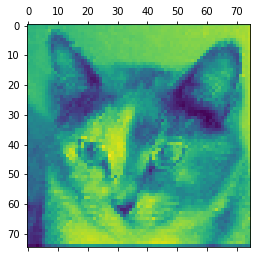

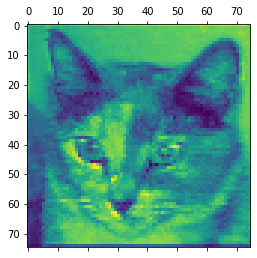

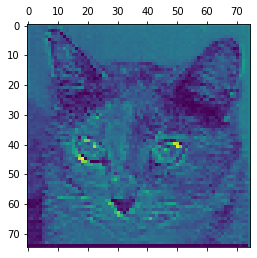

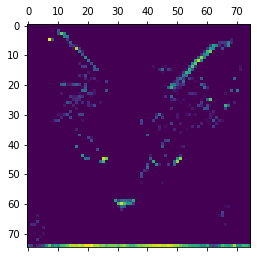

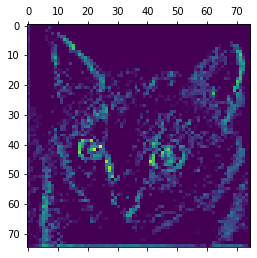

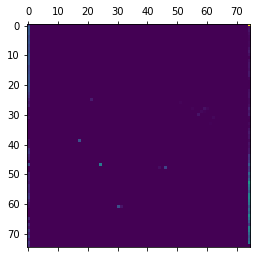

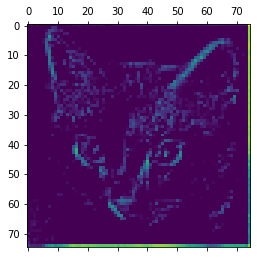

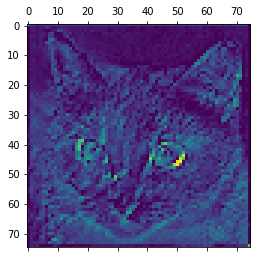

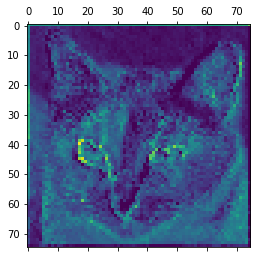

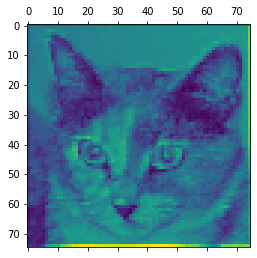

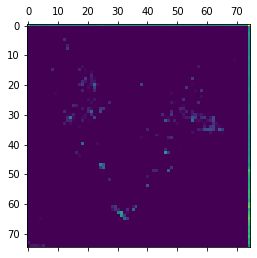

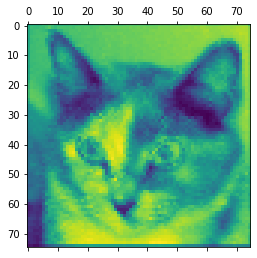

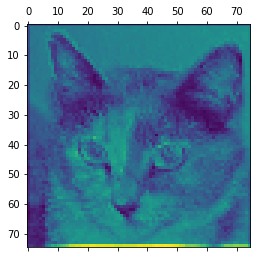

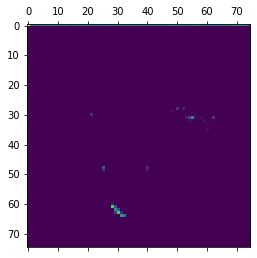

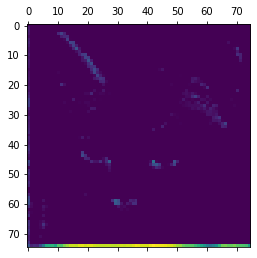

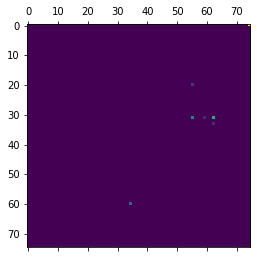

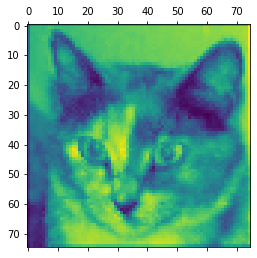

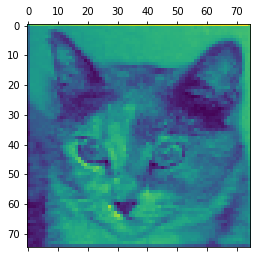

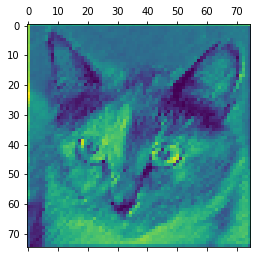

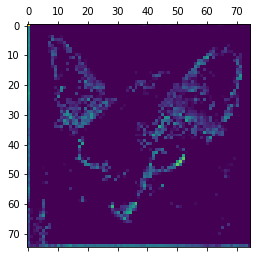

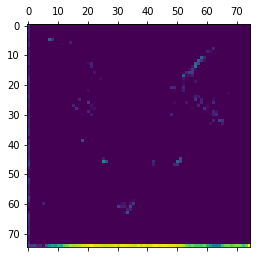

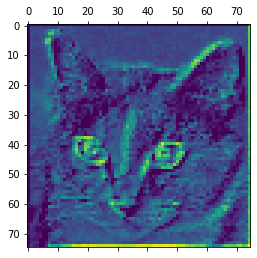

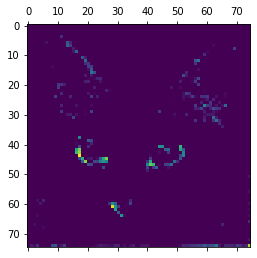

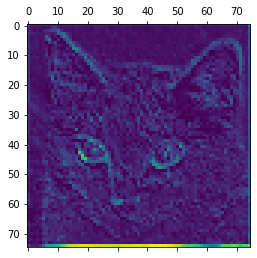

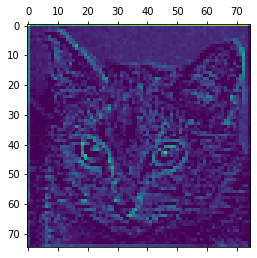

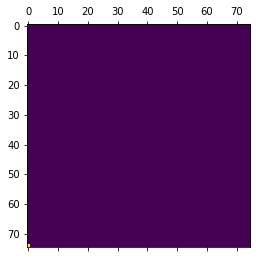

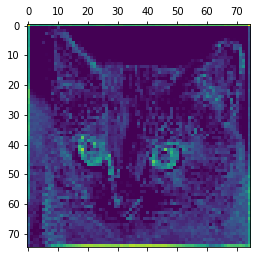

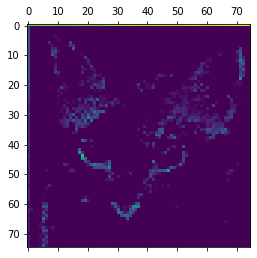

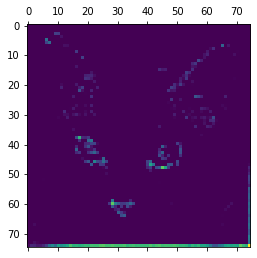

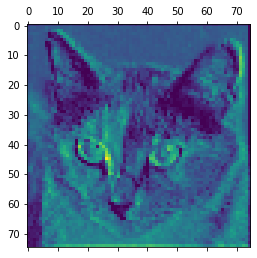

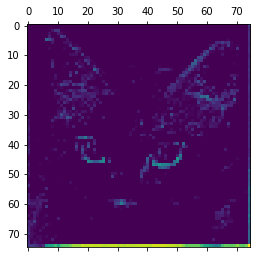

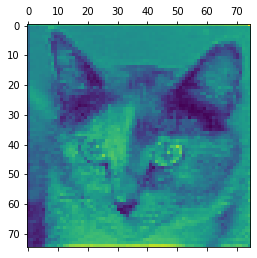

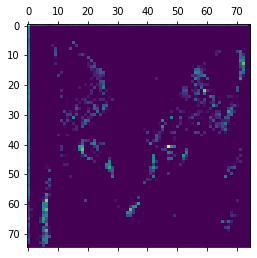

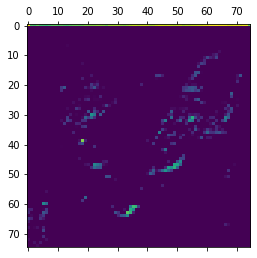

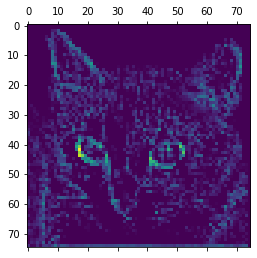

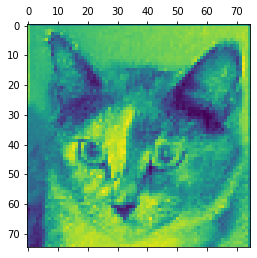

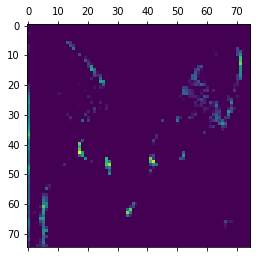

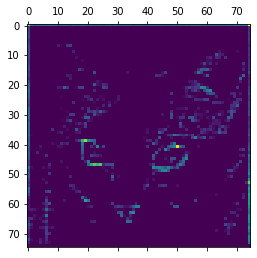

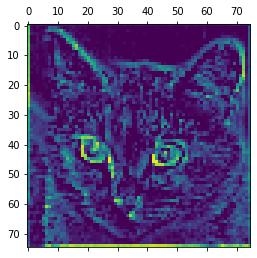

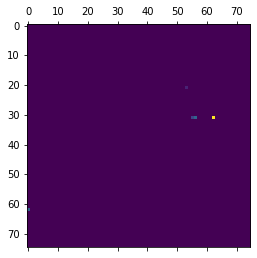

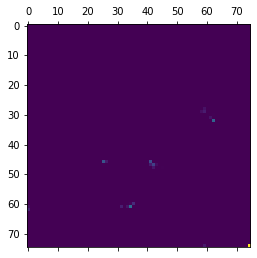

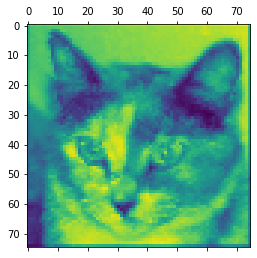

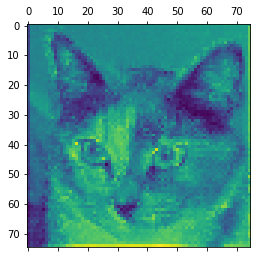

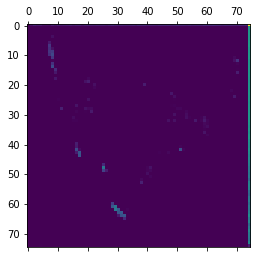

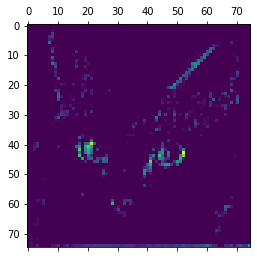

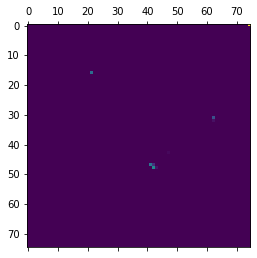

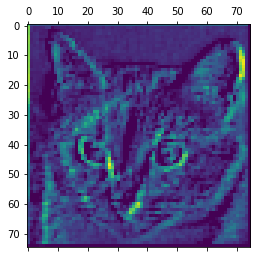

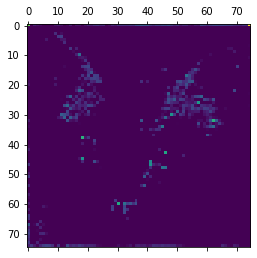

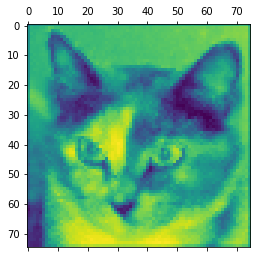

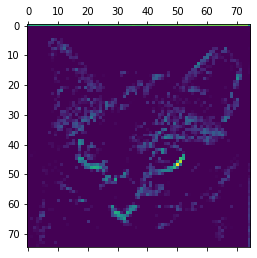

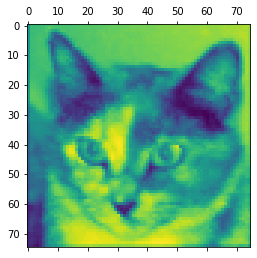

In [19]:
g = tf.get_default_graph()
x = g.get_tensor_by_name('input_1:0')
first_layer = g.get_tensor_by_name('block1_pool/MaxPool:0') 

with tf.Session() as sess:
    #init.run()
    saver.restore(sess, 'save/nn.ckpt')
    
    feed_dict = {x: img_tensor} # (1,150,150,3) 
    first_layer_run = sess.run(first_layer, feed_dict=feed_dict)
    print(first_layer_run.shape)
    for i in range(64):
        plt.matshow(first_layer_run[0, :, :, i], cmap='viridis')
        plt.show()   

INFO:tensorflow:Restoring parameters from save/nn.ckpt
(1, 75, 75, 64)


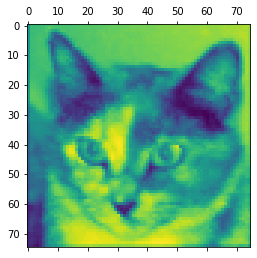

In [18]:
g = tf.get_default_graph()
x = g.get_tensor_by_name('input_1:0')
second_layer = g.get_tensor_by_name('block2_pool/MaxPool:0') 

with tf.Session() as sess:
    saver.restore(sess, 'save/nn.ckpt')
    
    feed_dict = {x: img_tensor}  
    second_layer_run = sess.run(second_layer, feed_dict=feed_dict)
    print(first_layer_run.shape)
    plt.matshow(first_layer_run[0, :, :, 63], cmap='viridis')
    plt.show() 

In [20]:
def display_activations(layer_name, layer_activation): 
    
    images_per_row = 16

    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
    plt.show()

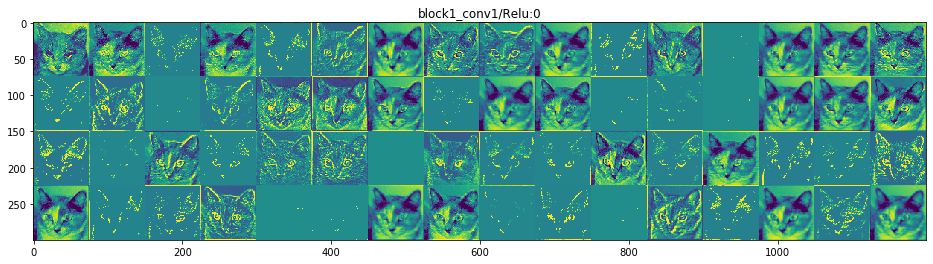

In [21]:
display_activations('block1_conv1/Relu:0', first_layer_run)

/Users/sungchullee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


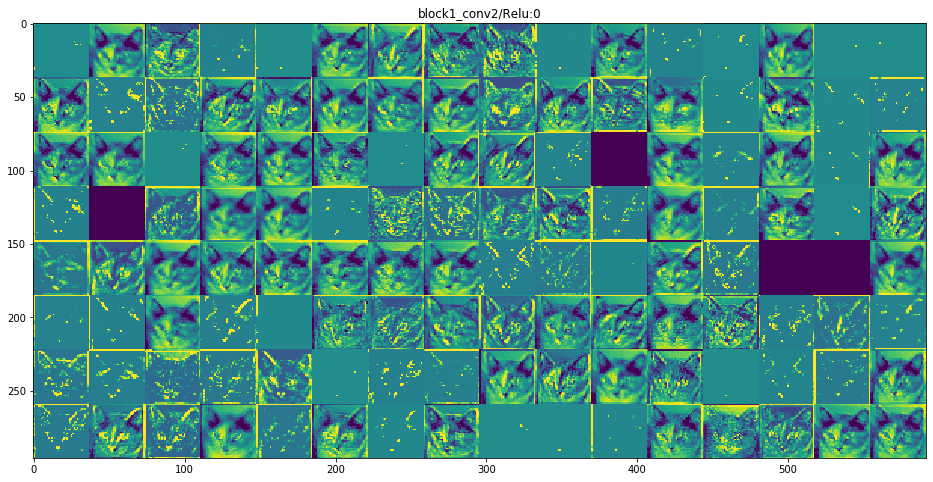

In [22]:
display_activations('block1_conv2/Relu:0', second_layer_run)

In [24]:
x = g.get_tensor_by_name('input_1:0')
block1_conv1 = g.get_tensor_by_name('block1_conv1/Relu:0')
block1_conv2 = g.get_tensor_by_name('block1_conv2/Relu:0')
block2_conv1 = g.get_tensor_by_name('block2_conv1/Relu:0')
block2_conv2 = g.get_tensor_by_name('block2_conv2/Relu:0')
block3_conv1 = g.get_tensor_by_name('block3_conv1/Relu:0')
block3_conv2 = g.get_tensor_by_name('block3_conv2/Relu:0')
block3_conv3 = g.get_tensor_by_name('block3_conv3/Relu:0')
tensor_list = [block1_conv1, block1_conv2,
               block2_conv1, block2_conv2,
               block3_conv1, block3_conv2, block3_conv3]
tensor_name_list = ['block1_conv1/Relu:0', 'block1_conv2/Relu:0',
                    'block2_conv1/Relu:0', 'block2_conv2/Relu:0',
                    'block3_conv1/Relu:0', 'block3_conv2/Relu:0', 'block3_conv3/Relu:0']

INFO:tensorflow:Restoring parameters from save/nn.ckpt


/Users/sungchullee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


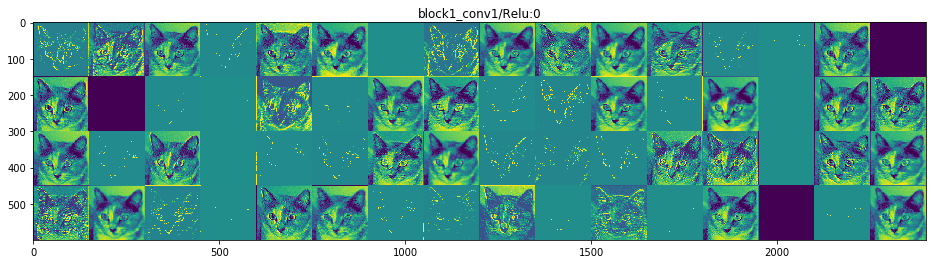

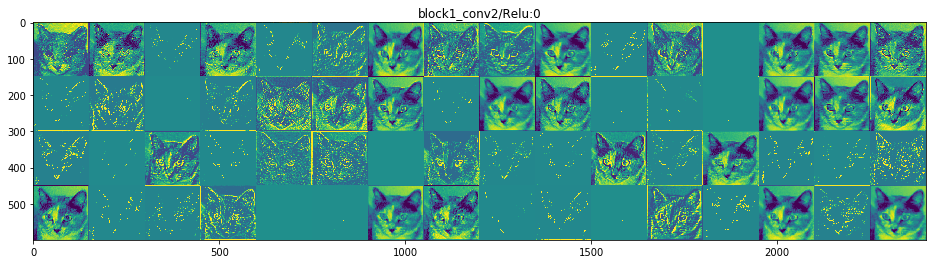

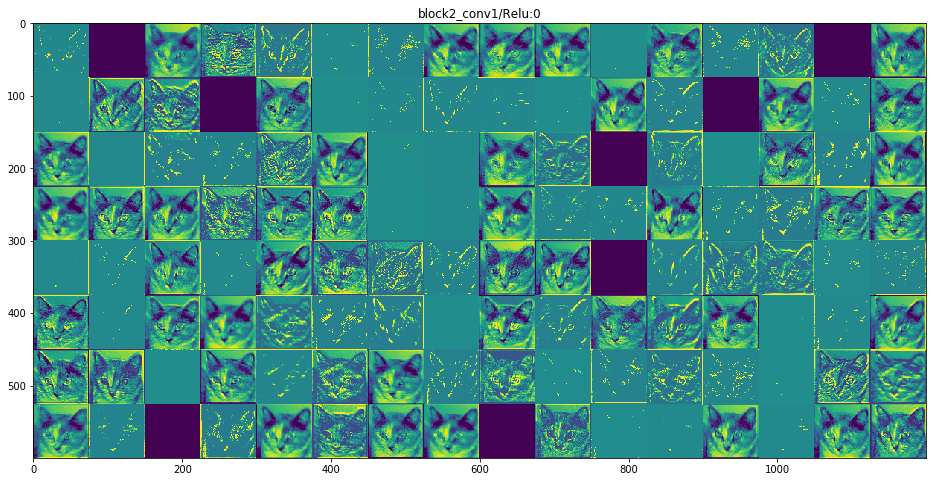

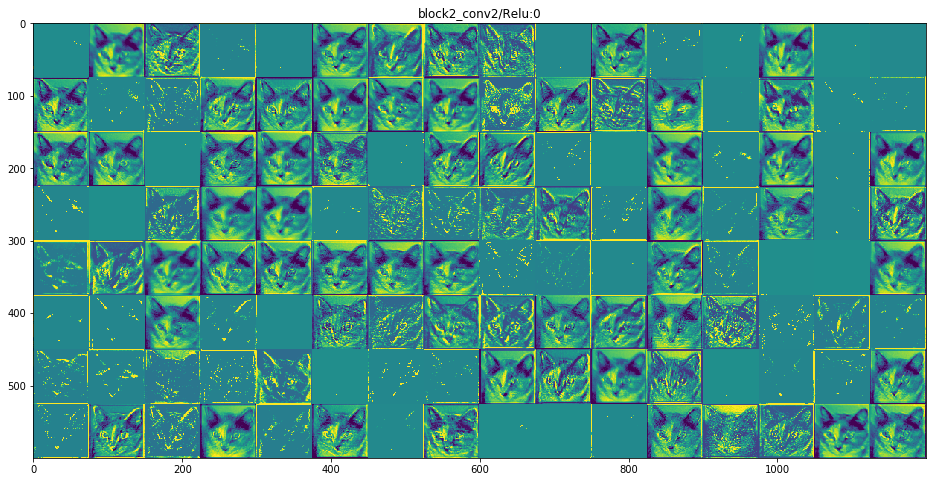

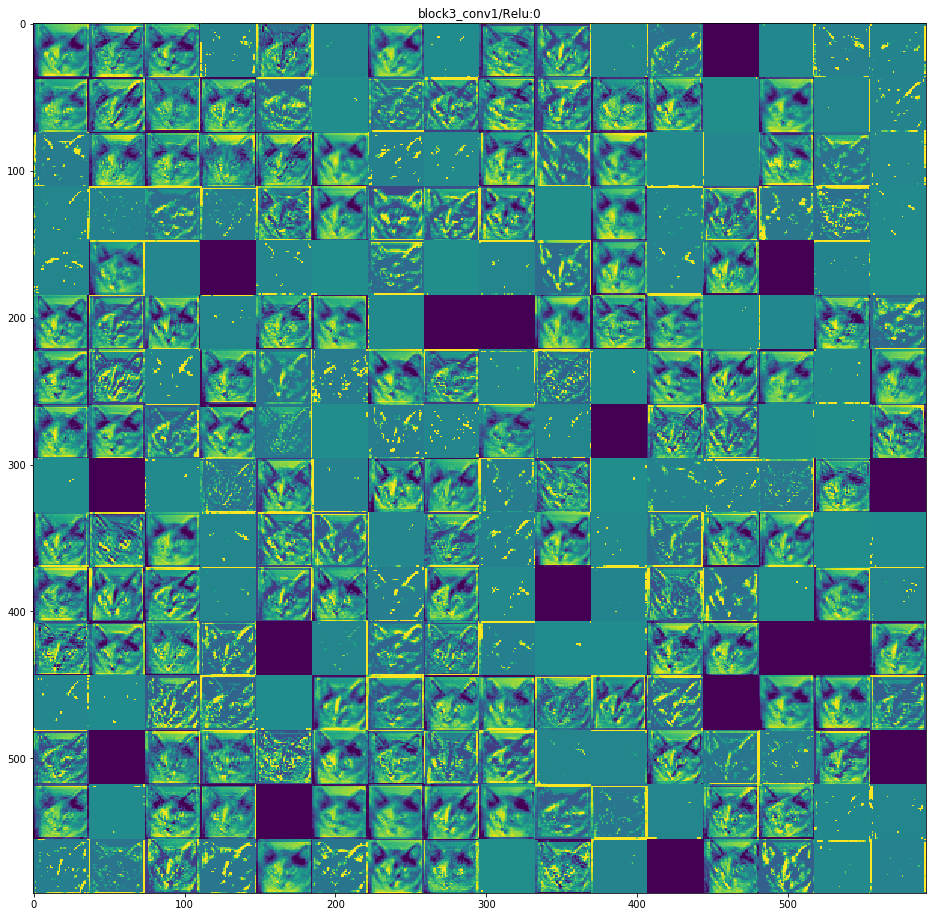

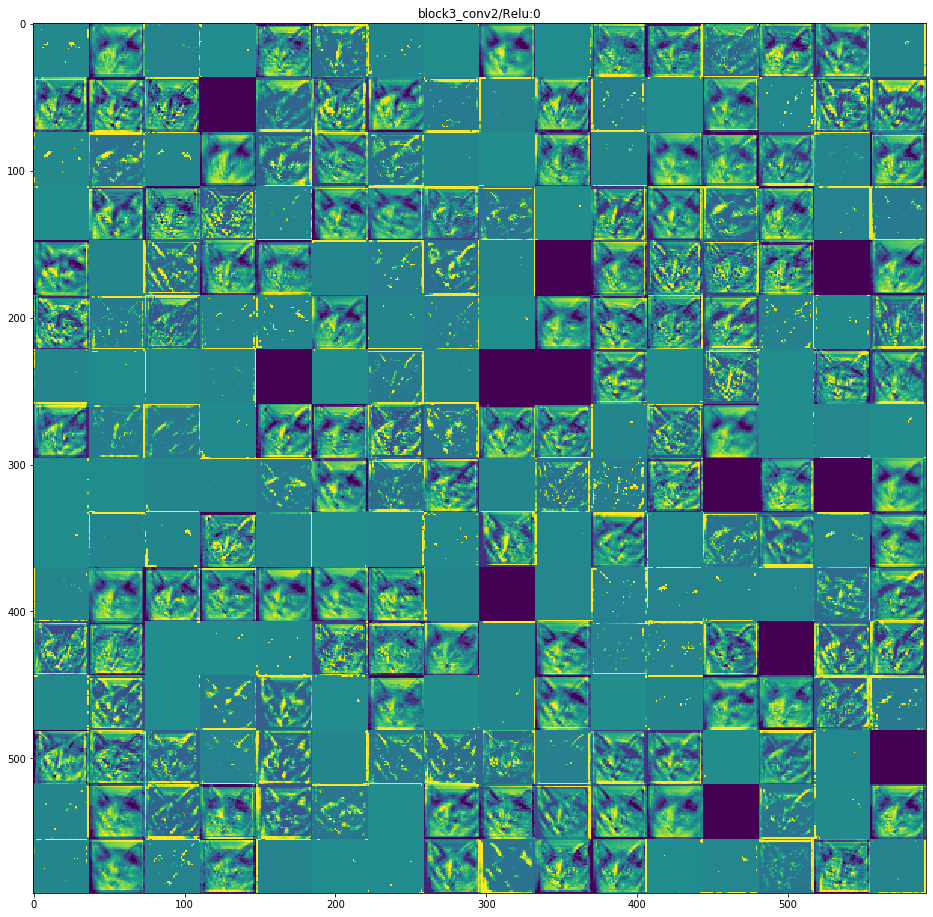

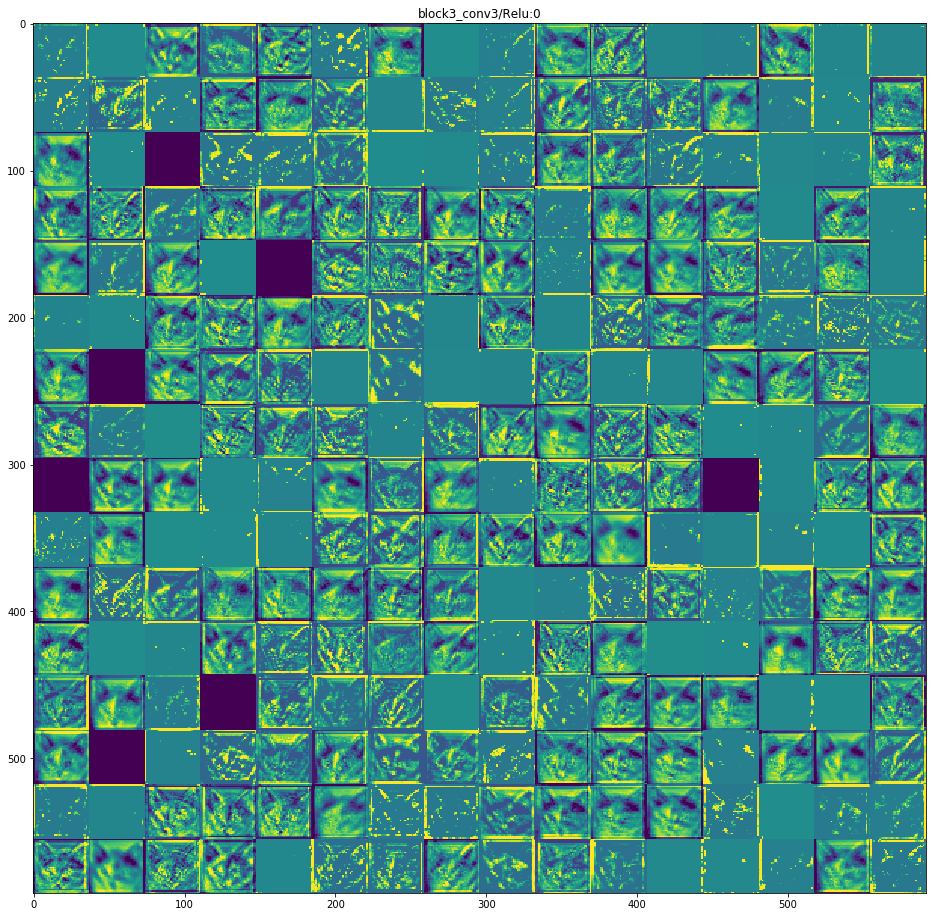

In [25]:
with tf.Session() as sess:
    saver.restore(sess, 'save/nn.ckpt')
    
    feed_dict = {x: img_tensor} 
    for tensor, tensor_name in zip(tensor_list, tensor_name_list):
        tensor_run = sess.run(tensor, feed_dict=feed_dict)
        display_activations(tensor_name, tensor_run)